<h3>Hierarchical Clustering</h3>

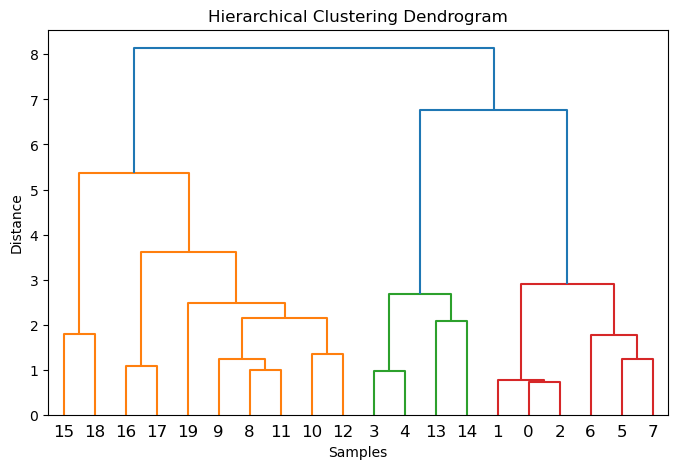

    ID            BEER  CAL  SOD  ALC  COST  Cluster
0    1       Budweiser  144   15  4.7  0.43        1
1    2         Schlitz  151   19  4.9  0.43        1
2    3       Lowenbrau  157   15  4.9  0.48        1
3    4     Kronenbourg  170    7  5.2  0.73        2
4    5        Heineken  152   11  5.0  0.77        2
5    6         Old Mil  145   23  4.6  0.28        1
6    7      Augsburger  175   24  5.5  0.40        1
7    8          Strohs  149   27  4.7  0.42        1
8    9     Miller lite   99   10  4.3  0.43        0
9   10       Bud light  113    8  3.7  0.44        0
10  11           Coors  140   18  4.6  0.44        0
11  12      Coors lite  102   15  4.1  0.45        0
12  13  Michelob light  135   11  4.2  0.50        0
13  14           Becks  150   19  4.7  0.76        2
14  15           Kirin  149    6  5.0  0.79        2
15  16           Pabst   68   15  2.3  0.38        0
16  17           Hamms  136   19  4.4  0.43        0
17  18       Heilemans  144   24  4.9  0.43   

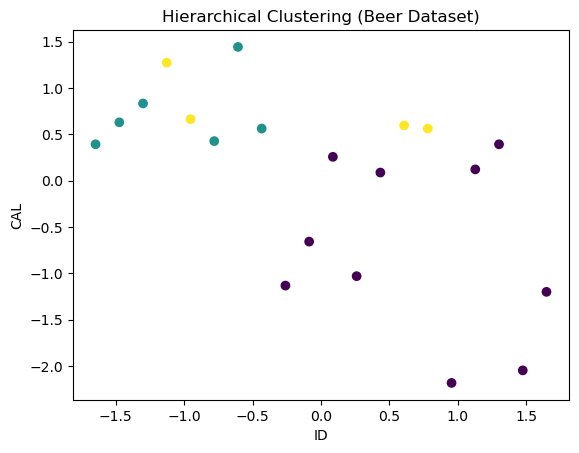

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Load beer dataset
df = pd.read_csv("D:\\MachineLearning\DataSets\\beerh.csv")   # or "beerc.csv"

# Use only numeric columns (CAL, SOD, ALC, COST...)
X = df.select_dtypes(include=['int64','float64'])

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --------------------------
# 1. DENDROGRAM
# --------------------------
plt.figure(figsize=(8, 5))
dendrogram(linkage(X_scaled, method="ward"))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# --------------------------
# 2. AGGLOMERATIVE CLUSTERING
# --------------------------
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = model.fit_predict(X_scaled)

df["Cluster"] = labels
print(df)

# --------------------------
# 3. SIMPLE CLUSTER PLOT
# --------------------------
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("Hierarchical Clustering (Beer Dataset)")
plt.show()
